In [1]:
#Import required libraries 
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
#Load the Dataset
df = pd.read_csv("C:/Users/princ/OneDrive/Desktop/Project/Netflix/Netflix.csv", index_col=0)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [102]:
#Remove the NaN values
df = df.fillna("Not Available")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Not Available,Not Available,Not Available,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [3]:
# Clean the 'country' column
df['country'] = df['country'].str.strip()
df['country'] = df['country'].replace("", "Not Available")
df['country'] = df['country'].fillna('Not Available')

df['country'] = df['country'].str.split(', ')
df = df.explode('country')

In [4]:
#Dataset Cleansing
df = df.drop_duplicates()
unique_countries_list = df['country'].unique()
unique_rating_list = df['rating'].unique()
print("Unique Values for Coutnries :\n", unique_countries_list)
print("Unique Values for Rating :\n", unique_rating_list)

Unique Values for Coutnries :
 ['United States' 'South Africa' 'Not Available' 'India' 'Ghana'
 'Burkina Faso' 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic'
 'Mexico' 'Turkey' 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan'
 'Nigeria' 'Spain' 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania'
 'Argentina' 'Venezuela' 'Hong Kong' 'Russia' '' 'Ireland' 'Nepal'
 'New Zealand' 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland'
 'Israel' 'Taiwan' 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Thailand'
 'Indonesia' 'Egypt' 'Denmark' 'Kuwait' 'Netherlands' 'Malaysia' 'Vietnam'
 'Hungary' 'Sweden' 'Lebanon' 'Syria' 'Philippines' 'Iceland'
 'United Arab Emirates' 'Norway' 'Qatar' 'Mauritius' 'Austria' 'Cameroon'
 'Palestine' 'Uruguay' 'United Kingdom,' 'Kenya' 'Chile' 'Luxembourg'
 'Cambodia' 'Bangladesh' 'Portugal' 'Cayman Islands' 'Senegal' 'Serbia'
 'Malta' 'Namibia' 'Angola' 'Peru' 'Mozambique' 'Cambodia,' 'Belarus'
 'Zimbabwe' 'Puerto Rico' 'Pakistan' 'Cyprus' 'Guatema

In [5]:
df.replace("NR", "Not Rated")
df.replace("nan", "Not Available")

df = df[~df['rating'].isin(['74 min' '84 min' '66 min'])]

df['country'] = df['country'].str.replace(r'[()"\'\s,]', '', regex=True)

In [6]:
df.groupby(['country', 'type']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

,country,type,count
176,UnitedStates,Movie,2751
67,India,Movie,961
177,UnitedStates,TV Show,938
174,UnitedKingdom,Movie,534
119,NotAvailable,Movie,440
120,NotAvailable,TV Show,390
27,Canada,Movie,319
52,France,Movie,303
175,UnitedKingdom,TV Show,272
81,Japan,TV Show,199


In [7]:
df['type'].value_counts()

type
Movie      7810
TV Show    3030
Name: count, dtype: int64

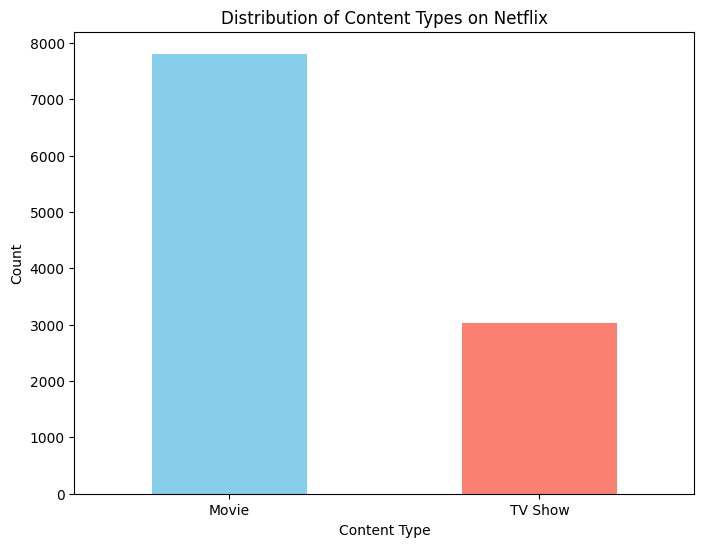

In [8]:
# Group the data by 'type' and count the number of occurrences
content_type_counts = df['type'].value_counts()

# Define colors for TV shows and movies
colors = ['skyblue', 'salmon']

# Plot the bar graph
plt.figure(figsize=(8, 6))
content_type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

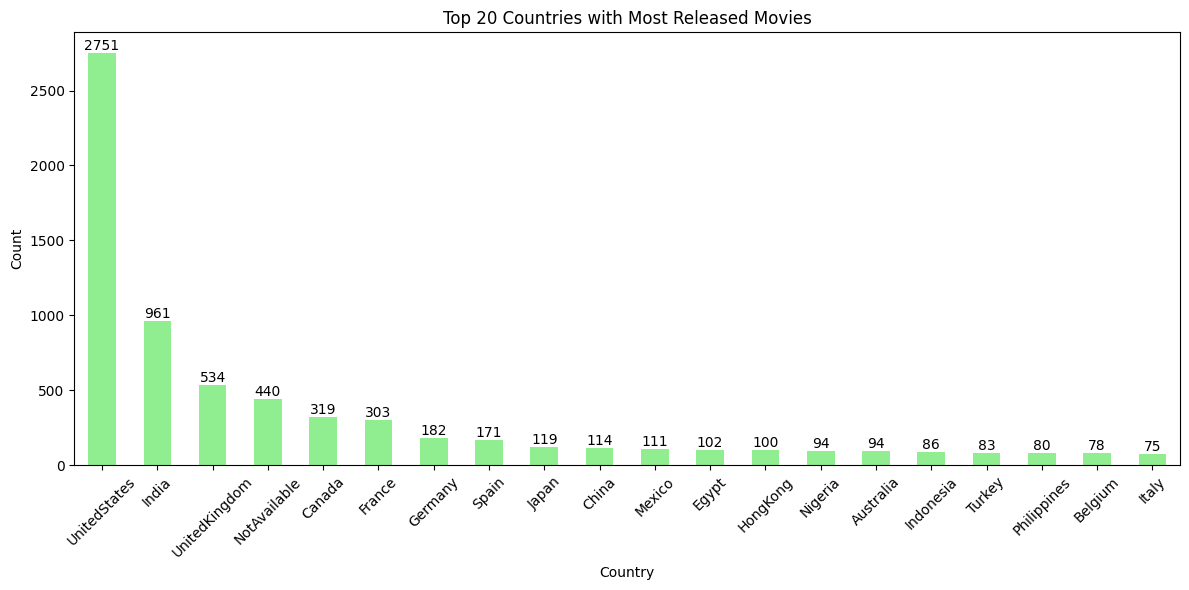

In [134]:
movie_df = df[df['type'] == 'Movie']
movie_counts = movie_df['country'].value_counts().sort_values(ascending = False).head(20)

plt.figure(figsize=(12, 6))
plot = movie_counts.plot(kind='bar', color='lightgreen')
plot.bar_label(plot.containers[0], fontsize=10, color='black', labels=movie_counts.values)
plt.title('Top 20 Countries with Most Released Movies')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

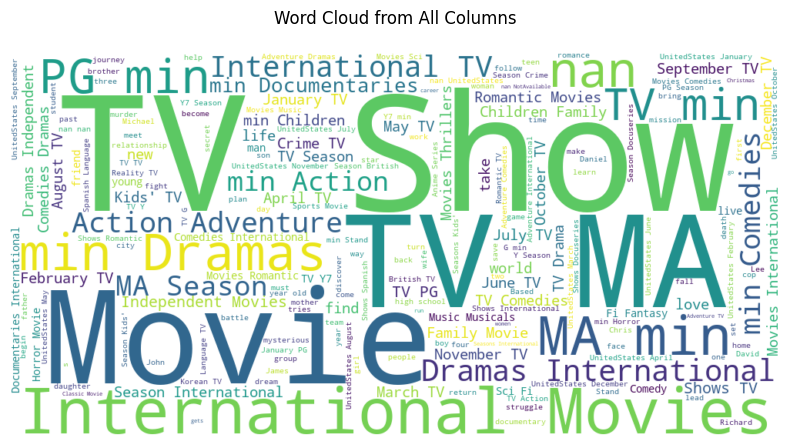

In [9]:
##WORLD CLOUD
text = ' '.join(df.astype(str).values.flatten())
# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from All Columns\n')
plt.show()


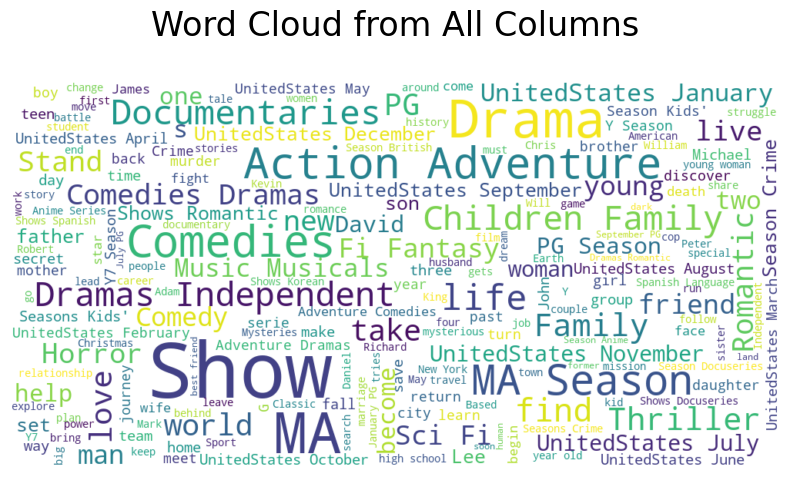

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(["Movie", "TV Show", "TV MA", "Movies", "International", "nan", "min","TV"])

wordcloud = WordCloud(max_font_size=100,
                      max_words=200,
                      width=1000, 
                      height=500, 
                      background_color='white',
                      stopwords=stopwords,
                      contour_width=3, 
                      contour_color='firebrick').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from All Columns\n', fontsize = 24)
plt.show()